### Imports

In [1]:
# imports
from feature_processor import *
from boosting import *

### Feature processing

In [2]:
# path to data folder
path = '/home/romain/clean_codes/9_boosting'
# name of file containing monthly features
feature_file = 'features.csv'
# name of file containing the information about monthly data
information_file = 'information.csv'

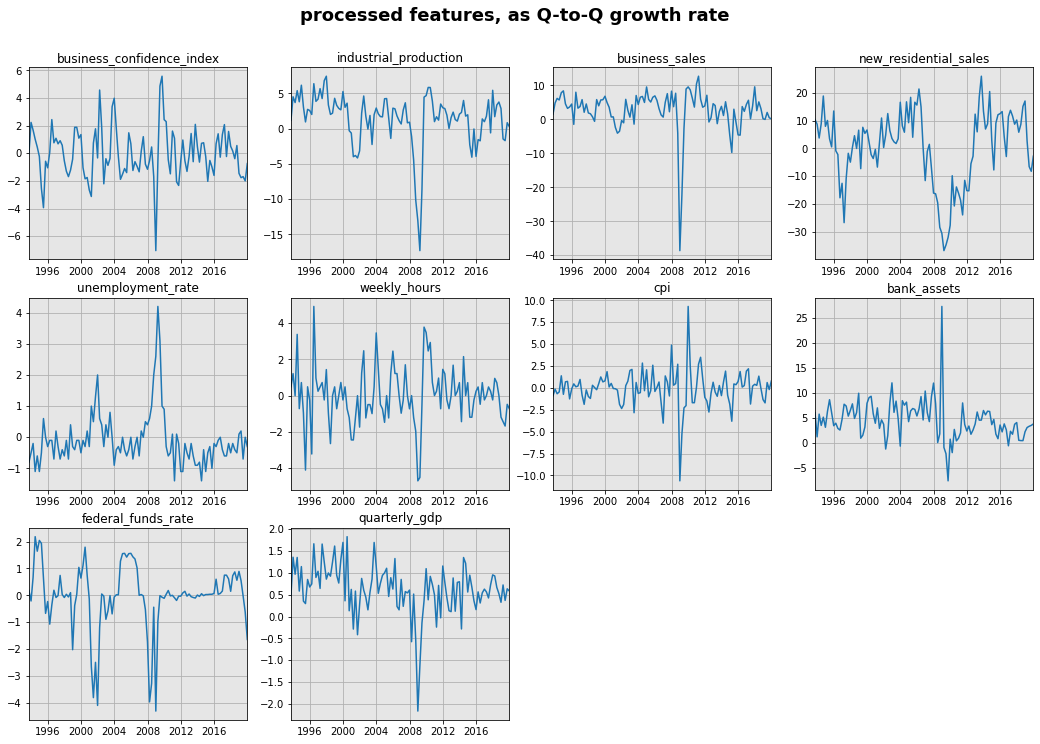

In [3]:
# declare feature processor
fp = FeatureProcessor(path, feature_file, information_file)
# load, process, and plot
fp.data_loader()
fp.data_processor()
fp.plot_processed_data()

In [4]:
# overview of processed features in dataframe
features = fp.processed_features
features.head(6)

,business_confidence_index,industrial_production,business_sales,new_residential_sales,unemployment_rate,weekly_hours,cpi,bank_assets,federal_funds_rate,quarterly_gdp
date,,,,,,,,,,
1993-09-30,-0.01763,1.174819,1.526916,10.375088,-0.8,0.489573,-0.896798,6.056690,0.18,0.477315
1993-12-31,2.23292,4.516257,4.820045,8.713100,-0.5,1.212714,-0.140156,1.243932,-0.21,1.360113
1994-03-31,1.67461,3.695746,6.177410,3.742247,-0.2,-0.009381,-0.671583,5.767958,0.67,0.970216
1994-06-30,1.01670,5.385214,5.706889,8.908318,-1.1,3.377695,-0.459493,3.522080,2.18,1.355046
1994-09-30,0.45180,3.808076,7.841516,18.823001,-0.6,-0.719138,1.381100,5.161621,1.64,0.584515
1994-12-31,-0.23480,6.156890,8.395498,7.938450,-1.1,0.719138,-0.734759,3.148223,2.04,1.145524


### VAR model

In [5]:
# Var parameters
# number of lags in the model
p = 2

# boosting parameters
# number of estimators
estimators = 20
# max tree depth
depth = 5
# minimum samples per split
split = 2
# learning rate
rate = 0.1

# declare boosted VAR
bv = Boosted_Var(features)
# create regressors
bv.regressors(p)
# train the random forest model
bv.train(estimators, depth, split, rate)

### predictions

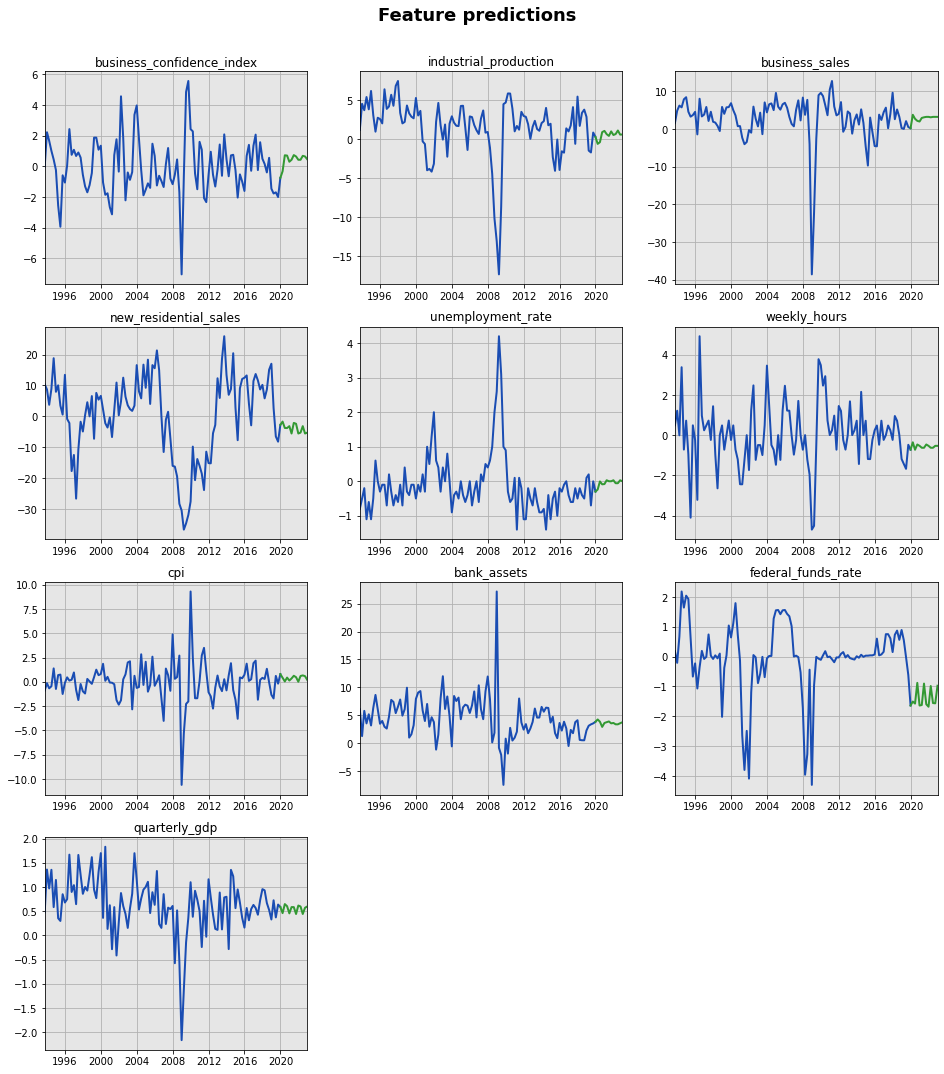

In [6]:
# number of periods ahead to forecast (in quarters)
h = 12
# generate predictions
bv.forecast(h)
# plot predictions
bv.plot_forecast()